# WRAPPER INSTALL

# LOADING LIBRARIES

In [68]:
# General-purpose libraries for operating system interactions, JSON data manipulation, and date/time handling.
import os  # Interact with the operating system
import json  # Work with JSON data
from random import randint  # Generate random integers
from time import sleep  # Introduce delays in code execution

from datetime import datetime, timedelta  # Manipulate dates and times


# Fundamental scientific computing libraries like NumPy and Pandas.
import numpy as np  # Fundamental package for scientific computing
import pandas as pd  # Data manipulation library


# Specialized libraries for scientific computing, namely SciPy
import scipy  # Scientific computing and technical computing library
import scipy.stats as st

# Web-related tasks, such as making HTTP requests, parsing HTML/XML data, and web scraping
import requests as re  # Perform HTTP requests
from bs4 import BeautifulSoup  # Parse HTML and XML data


# Pretty-print Python data structures
import pprint


# Visualization oriented
import matplotlib.pyplot as plt  # Create static visualizations
import seaborn as sns  # Statistical data visualization
from plotly import express as px  # Create interactive plots and charts


# Machine learning : preprocessing, dimensionality reduction, one-hot encoding, and clustering
import sklearn  # Machine learning library
from sklearn.preprocessing import StandardScaler  # Standardize features
from sklearn.decomposition import PCA  # Perform dimensionality reduction
from sklearn.preprocessing import OneHotEncoder  # One-hot encode categorical features
from sklearn.cluster import KMeans  # Perform clustering


#Handling Imbalanced Datasets
import imblearn  # Handle imbalanced datasets in machine learning


#Web Scraping
import scrapy  # Web scraping framework


#Deep Learning
# import pytorch  # Deep learning library

# DATA COLLECTING

# FIRST LOOK AT THE DATASET

In [69]:
data = pd.read_csv("data.csv")

In [70]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [72]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [73]:
data.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool

In [74]:
data.isnull().any(axis=1).value_counts()

False    6819
dtype: int64

In [75]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [76]:
display(data)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [77]:
all_columns

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.302646,1.256969e-04,0.000000e+00,0.458143,...,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.303556,2.897851e-04,0.000000e+00,0.461867,...,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.302035,2.361297e-04,2.550000e+07,0.458521,...,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.303350,1.078888e-04,0.000000e+00,0.465705,...,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.303475,7.890000e+09,0.000000e+00,0.462746,...,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.604455,0.998992,0.797409,0.303510,1.510213e-04,4.500000e+09,0.463734,...,0.314063,0.027951,0,0.000466,0.623620,0.840359,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.598308,0.998992,0.797414,0.303520,5.220000e+09,1.440000e+09,0.461978,...,0.314446,0.031470,0,0.001959,0.623931,0.840306,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.610444,0.998984,0.797401,0.303512,2.509312e-04,1.039086e-04,0.472189,...,0.313353,0.007542,0,0.002840,0.624156,0.840138,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.607850,0.999074,0.797500,0.303498,1.236154e-04,2.510000e+09,0.476123,...,0.320118,0.022916,0,0.002837,0.623957,0.841084,0.026822,0.565302,1,0.044009


In [78]:
all_columns = data.loc[:, :]
display(all_columns)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [79]:
print("Les doublons suivants ont été trouvés:\n")
display(data.loc[data.duplicated(subset=all_columns, keep=False)])


Les doublons suivants ont été trouvés:



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


# DATA CLEANING

In [80]:
corr_matrix = data.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

pprint.pprint(to_drop)

[' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 ' Liability to Equity']


In [81]:
data.drop(to_drop, inplace=True, axis=1)

# DATA VISUALIZATION

In [82]:
corr_matrix = data.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

pprint.pprint(to_drop)

[]


In [83]:
# # Create a boxplot for each selected column
# # data["?"].boxplot()
# plt.boxplot(data['Bankrupt?'])

# plt.title('Boxplot for Bankrupt?')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.ticklabel_format(style='plain', axis='y')


# # Display the plot
# plt.show()

In [84]:
# import matplotlib.pyplot as plt

# # Iterate over each column in all_columns
# for column in all_columns:
#     plt.boxplot(data[column])
#     plt.title(f'Boxplot for {column}')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.ticklabel_format(style='plain', axis='y')
    
#     # Display the plot for each column
#     plt.show()


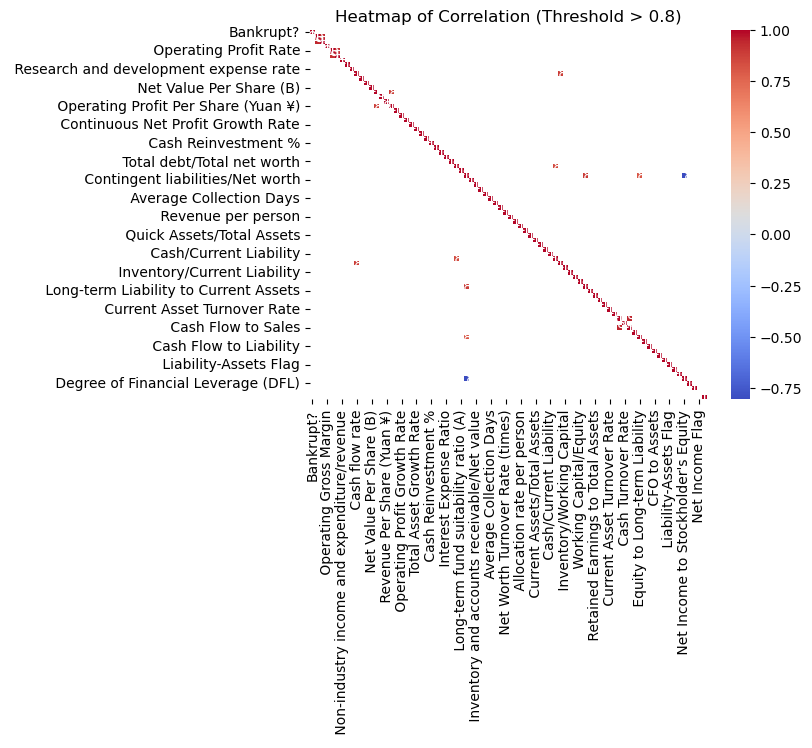

In [85]:
import seaborn as sns
import numpy as np

# # Select the columns from the DataFrame
# selected_data = data[all_columns]

# Create a correlation matrix
correlation_matrix = all_columns.corr()

# Apply a threshold to the correlation matrix
correlation_matrix_thresholded = correlation_matrix.mask(correlation_matrix.abs() <= 0.8, np.nan)

# Create the heatmap
sns.heatmap(correlation_matrix_thresholded, cmap='coolwarm', annot=True)

# Set the title
plt.title('Heatmap of Correlation (Threshold > 0.8)')

# Display the heatmap
plt.show()


In [ ]:
import seaborn as sns

# Create a correlation matrix for the selected columns
correlation_matrix = data[all_columns].corr()

# Filter the correlation matrix and selected_data based on the threshold
threshold = 0.80
correlation_matrix_filtered = correlation_matrix[correlation_matrix.abs() >= threshold]
selected_data_filtered = data[all_columns][correlation_matrix.abs() >= threshold]

# Create the heatmap
sns.heatmap(correlation_matrix_filtered, cmap='coolwarm', annot=True)

# Set the title
plt.title(f'Heatmap of Correlation (Threshold >= {threshold})')

# Display the heatmap
plt.show()


# DATA SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()
fitted_scaler = scaler.fit(data)
X_normalized = audio_scaler.transform(data)

with open("scaler.pickle", "wb") as f: #saves the model in dir and file name given
    pickle.dump(audio_scaler,f)

# DATA EXPORTING

In [ ]:
data.to_csv("cleaned_scaled_data.csv", sep = ";", index = False)